In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Dataset created and imported from the 2018_2023_cocaine_and_fentanyl_analysis notebook from data derived from the CDC DOSE-DIS Dashboard: Nonfatal Overdose Emergency Department and Inpatient Hospitalization Discharge Data https://www.cdc.gov/overdose-prevention/data-research/facts-stats/dose-dashboard-nonfatal-discharge-data.html

In [2]:
states = gpd.read_file('../data/states.csv')

Derived from the CDC State abbreviations data https://www.cdc.gov/wcms/4.0/cdc-wp/data-presentation/data/data-map-state-abbreviations.csv

In [3]:
list_state_abv = gpd.read_file('../data/data-map-state-abbreviations.csv')

US State Map read in using geojson file. Obtained via https://public.opendatasoft.com/explore/dataset/us-state-boundaries/export/?flg=en-us&location=3,40.44695,-48.60352&basemap=jawg.light

In [5]:
state_map = gpd.read_file('../data/us-state-boundaries.geojson')

In [6]:
list_state_abv.head()

,Name,Abbreviation,geometry
0,Alabama,AL,None
1,Alaska,AK,None
2,American Samoa,AS,None
3,Arizona,AZ,None
4,Arkansas,AR,None


In [7]:
states.head()

,field_1,jurisdiction,month,year,time_frame,dataset,count_alldrug,count_opioid,count_fentanyl,count_heroin,...,population,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine,geometry
0,0,AK,all,2018,annual,ED,792,230,,135,...,736624,107.5,31.2,,18.3,6.5,suppressed,,6,None
1,1,AK,all,2018,annual,HOSP,335,107,,27,...,736624,45.5,14.5,,3.7,7.2,suppressed,,3.5,None
2,2,AK,all,2019,annual,ED,768,249,,126,...,733603,104.7,33.9,,17.2,6,suppressed,,3.7,None
3,3,AK,all,2019,annual,HOSP,346,112,,25,...,733603,47.2,15.3,,3.4,9.5,suppressed,,3,None
4,4,AK,all,2020,annual,ED,814,320,,131,...,732964,111.1,43.7,,17.9,6.8,suppressed,,3.8,None


In [8]:
states = pd.merge(left= states, right= list_state_abv,
                 left_on='jurisdiction', right_on= 'Abbreviation')

states

,field_1,jurisdiction,month,year,time_frame,dataset,count_alldrug,count_opioid,count_fentanyl,count_heroin,...,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine,geometry_x,Name,Abbreviation,geometry_y
0,0,AK,all,2018,annual,ED,792,230,,135,...,,18.3,6.5,suppressed,,6,None,Alaska,AK,None
1,1,AK,all,2018,annual,HOSP,335,107,,27,...,,3.7,7.2,suppressed,,3.5,None,Alaska,AK,None
2,2,AK,all,2019,annual,ED,768,249,,126,...,,17.2,6,suppressed,,3.7,None,Alaska,AK,None
3,3,AK,all,2019,annual,HOSP,346,112,,25,...,,3.4,9.5,suppressed,,3,None,Alaska,AK,None
4,4,AK,all,2020,annual,ED,814,320,,131,...,,17.9,6.8,suppressed,,3.8,None,Alaska,AK,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,5104,WI,12,2021,monthly,HOSP,153,70,11,19,...,suppressed,suppressed,0.5,suppressed,,suppressed,None,Wisconsin,WI,None
4793,5105,WI,12,2022,monthly,ED,562,227,13,95,...,suppressed,1.6,0.3,suppressed,suppressed,0.6,None,Wisconsin,WI,None
4794,5106,WI,12,2022,monthly,HOSP,158,59,16,17,...,suppressed,suppressed,0.5,0.4,suppressed,suppressed,None,Wisconsin,WI,None
4795,5107,WI,12,2023,monthly,ED,481,147,16,36,...,suppressed,0.6,0.4,suppressed,suppressed,suppressed,None,Wisconsin,WI,None


In [9]:
state_map.head()

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,...,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry
0,13,348013711,0,18.326748,United States Virgin Islands,35,1550244357,-64.971250,-1857358206,A,...,78,01802710,18.059379,United States Virgin Islands,G4000,9,00,78,"{'lon': -64.8390395698, 'lat': 18.0599451556}","MULTIPOLYGON (((-64.84373 18.39371, -64.83062 ..."
1,50,-1459974156,3,44.630907,Wisconsin,16,-703725080,-89.709392,317035270,A,...,55,01779806,44.627322,Wisconsin,G4000,2,00,55,"{'lon': -89.7328946459, 'lat': 44.6398938154}","POLYGON ((-92.88707 45.64415, -92.88250 45.659..."
2,44,-1896337421,1,44.060479,Vermont,10,1031126051,-72.673327,-1858637503,A,...,50,01779802,44.069387,Vermont,G4000,1,00,50,"{'lon': -72.6626510555, 'lat': 44.0752509757}","POLYGON ((-73.31328 44.26413, -73.31091 44.274..."
3,49,1870899812,2,40.107274,New Jersey,15,-753053640,-74.665201,-1799523090,A,...,34,01779795,40.105049,New Jersey,G4000,1,00,34,"{'lon': -74.6555473755, 'lat': 40.1102763626}","POLYGON ((-75.18960 40.59178, -75.19229 40.602..."
4,56,-1152137026,5,32.629579,Georgia,22,444263739,-83.423511,269008297,A,...,13,01705317,32.627916,Georgia,G4000,3,00,13,"{'lon': -83.427200622, 'lat': 32.6386626049}","POLYGON ((-85.38658 33.90172, -85.42947 34.125..."


In [10]:
_50state_map= (
    state_map
    .loc[state_map['name']!='United States Virgin Islands']
    .loc[state_map['name']!='Commonwealth of the Northern Mariana Islands']
    .loc[state_map['name']!='Puerto Rico']
    .loc[state_map['name']!='Guam']
    .loc[state_map['name']!='American Samoa']
)
_50state_map

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,...,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry
1,50,-1459974156,3,44.630907,Wisconsin,16,-703725080,-89.709392,317035270,A,...,55,01779806,44.627322,Wisconsin,G4000,2,00,55,"{'lon': -89.7328946459, 'lat': 44.6398938154}","POLYGON ((-92.88707 45.64415, -92.88250 45.659..."
2,44,-1896337421,1,44.060479,Vermont,10,1031126051,-72.673327,-1858637503,A,...,50,01779802,44.069387,Vermont,G4000,1,00,50,"{'lon': -72.6626510555, 'lat': 44.0752509757}","POLYGON ((-73.31328 44.26413, -73.31091 44.274..."
3,49,1870899812,2,40.107274,New Jersey,15,-753053640,-74.665201,-1799523090,A,...,34,01779795,40.105049,New Jersey,G4000,1,00,34,"{'lon': -74.6555473755, 'lat': 40.1102763626}","POLYGON ((-75.18960 40.59178, -75.19229 40.602..."
4,56,-1152137026,5,32.629579,Georgia,22,444263739,-83.423511,269008297,A,...,13,01705317,32.627916,Georgia,G4000,3,00,13,"{'lon': -83.427200622, 'lat': 32.6386626049}","POLYGON ((-85.38658 33.90172, -85.42947 34.125..."
5,20,158364994,5,38.904103,District of Columbia,54,18633403,-77.017229,-1754367606,A,...,11,01702382,38.904758,District of Columbia,G4000,3,00,11,"{'lon': -77.0163213502, 'lat': 38.9047679414}","POLYGON ((-77.11975 38.93435, -77.04088 38.995..."
6,22,2140782230,8,34.203936,Arizona,56,1027348231,-111.606357,1671972589,A,...,04,01779777,34.275053,Arizona,G4000,4,00,04,"{'lon': -111.664551938, 'lat': 34.2930127751}","POLYGON ((-114.51645 33.02762, -114.52013 33.0..."
7,27,861485430,8,39.331093,Nevada,40,2047350889,-116.615147,-1799193962,A,...,32,01779793,39.329233,Nevada,G4000,4,00,32,"{'lon': -116.655208718, 'lat': 39.35603619}","POLYGON ((-119.32418 41.99392, -118.67650 41.9..."
8,5,2141806805,8,38.993848,Colorado,27,1174677436,-105.508317,307146555,A,...,08,01779779,38.997617,Colorado,G4000,4,00,08,"{'lon': -105.54785684, 'lat': 38.9985186267}","POLYGON ((-109.05095 40.22265, -109.05125 40.4..."
9,6,552436514,5,33.874177,South Carolina,28,775849516,-80.854270,-1945417158,A,...,45,01779799,33.875938,South Carolina,G4000,3,00,45,"{'lon': -80.864660852, 'lat': 33.8779486788}","POLYGON ((-82.74101 34.20886, -82.74234 34.213..."
10,7,1570063024,7,35.590051,Oklahoma,29,-921131230,-97.486815,313259141,A,...,40,01102857,35.588567,Oklahoma,G4000,3,00,40,"{'lon': -97.508093637, 'lat': 35.5833682774}","POLYGON ((-100.00376 36.49985, -103.00237 36.5..."


In [11]:
state_map['name'].unique()

array(['United States Virgin Islands', 'Wisconsin', 'Vermont',
       'New Jersey', 'Georgia', 'District of Columbia', 'Arizona',
       'Nevada', 'Colorado', 'South Carolina', 'Oklahoma', 'Indiana',
       'Rhode Island', 'Washington', 'Louisiana', 'Illinois', 'Alabama',
       'Ohio', 'Virginia', 'Idaho', 'Nebraska', 'Hawaii', 'Kansas',
       'Delaware', 'Montana', 'Maryland', 'New Mexico', 'Kentucky',
       'South Dakota', 'Alaska', 'Minnesota', 'New Hampshire', 'Michigan',
       'Puerto Rico', 'Commonwealth of the Northern Mariana Islands',
       'Arkansas', 'West Virginia', 'Maine', 'Texas', 'Guam',
       'Connecticut', 'Pennsylvania', 'New York', 'Iowa', 'Florida',
       'Missouri', 'Tennessee', 'Wyoming', 'North Dakota',
       'North Carolina', 'Utah', 'Mississippi', 'Massachusetts',
       'American Samoa', 'California', 'Oregon'], dtype=object)

In [12]:
state_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gid           56 non-null     int64   
 1   arealand      56 non-null     object  
 2   division      56 non-null     int64   
 3   intptlat      56 non-null     float64 
 4   name          56 non-null     object  
 5   objectid      56 non-null     int64   
 6   areawater     56 non-null     object  
 7   intptlon      56 non-null     float64 
 8   oid           56 non-null     object  
 9   funcstat      56 non-null     object  
 10  centlon       56 non-null     float64 
 11  stusab        56 non-null     object  
 12  state         56 non-null     object  
 13  statens       56 non-null     object  
 14  centlat       56 non-null     float64 
 15  basename      56 non-null     object  
 16  mtfcc         56 non-null     object  
 17  region        56 non-null     int64   
 18  lsad

<Axes: >

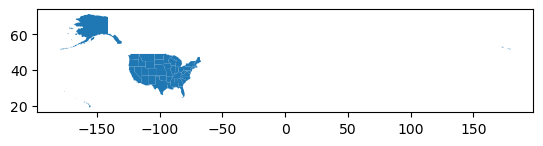

In [62]:
_50state_map.plot()

In [60]:
_50state_map

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,...,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry
1,50,-1459974156,3,44.630907,Wisconsin,16,-703725080,-89.709392,317035270,A,...,55,01779806,44.627322,Wisconsin,G4000,2,00,55,"{'lon': -89.7328946459, 'lat': 44.6398938154}","POLYGON ((-92.88707 45.64415, -92.88250 45.659..."
2,44,-1896337421,1,44.060479,Vermont,10,1031126051,-72.673327,-1858637503,A,...,50,01779802,44.069387,Vermont,G4000,1,00,50,"{'lon': -72.6626510555, 'lat': 44.0752509757}","POLYGON ((-73.31328 44.26413, -73.31091 44.274..."
3,49,1870899812,2,40.107274,New Jersey,15,-753053640,-74.665201,-1799523090,A,...,34,01779795,40.105049,New Jersey,G4000,1,00,34,"{'lon': -74.6555473755, 'lat': 40.1102763626}","POLYGON ((-75.18960 40.59178, -75.19229 40.602..."
4,56,-1152137026,5,32.629579,Georgia,22,444263739,-83.423511,269008297,A,...,13,01705317,32.627916,Georgia,G4000,3,00,13,"{'lon': -83.427200622, 'lat': 32.6386626049}","POLYGON ((-85.38658 33.90172, -85.42947 34.125..."
5,20,158364994,5,38.904103,District of Columbia,54,18633403,-77.017229,-1754367606,A,...,11,01702382,38.904758,District of Columbia,G4000,3,00,11,"{'lon': -77.0163213502, 'lat': 38.9047679414}","POLYGON ((-77.11975 38.93435, -77.04088 38.995..."
6,22,2140782230,8,34.203936,Arizona,56,1027348231,-111.606357,1671972589,A,...,04,01779777,34.275053,Arizona,G4000,4,00,04,"{'lon': -111.664551938, 'lat': 34.2930127751}","POLYGON ((-114.51645 33.02762, -114.52013 33.0..."
7,27,861485430,8,39.331093,Nevada,40,2047350889,-116.615147,-1799193962,A,...,32,01779793,39.329233,Nevada,G4000,4,00,32,"{'lon': -116.655208718, 'lat': 39.35603619}","POLYGON ((-119.32418 41.99392, -118.67650 41.9..."
8,5,2141806805,8,38.993848,Colorado,27,1174677436,-105.508317,307146555,A,...,08,01779779,38.997617,Colorado,G4000,4,00,08,"{'lon': -105.54785684, 'lat': 38.9985186267}","POLYGON ((-109.05095 40.22265, -109.05125 40.4..."
9,6,552436514,5,33.874177,South Carolina,28,775849516,-80.854270,-1945417158,A,...,45,01779799,33.875938,South Carolina,G4000,3,00,45,"{'lon': -80.864660852, 'lat': 33.8779486788}","POLYGON ((-82.74101 34.20886, -82.74234 34.213..."
10,7,1570063024,7,35.590051,Oklahoma,29,-921131230,-97.486815,313259141,A,...,40,01102857,35.588567,Oklahoma,G4000,3,00,40,"{'lon': -97.508093637, 'lat': 35.5833682774}","POLYGON ((-100.00376 36.49985, -103.00237 36.5..."


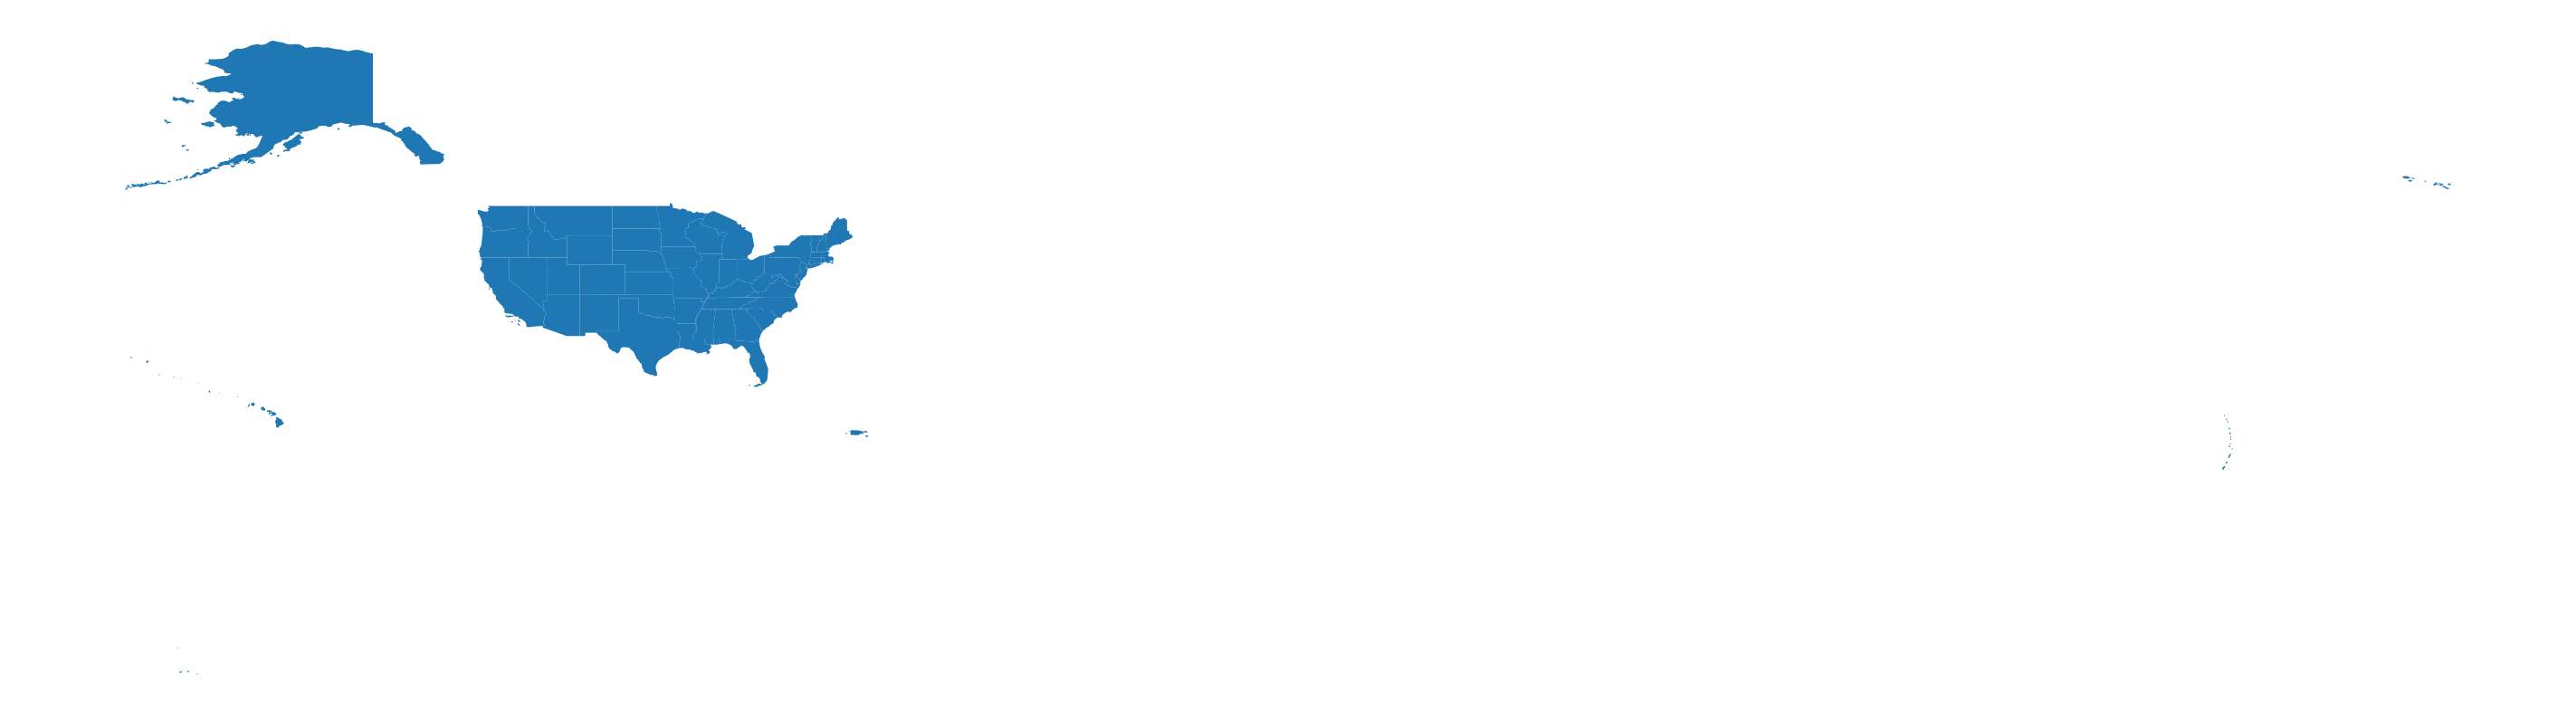

In [14]:
fig, ax = plt.subplots(figsize=(200,10))
state_map.plot(ax = ax)
ax.axis('off');

In [15]:
states['population']= states['population'].astype(float)

In [16]:
year_only = states[states['month']=='all']
not_us = year_only[year_only['jurisdiction'] != 'US']


In [17]:
cols_to_convert = [
    'population', 'count_cocaine', 'count_fentanyl'
]
for col in cols_to_convert:
    not_us[col] = pd.to_numeric(not_us[col], errors='coerce')

In [18]:
#cocaine df per state
coke_states= not_us.groupby(
    ['Name','jurisdiction', 'population']
)['count_cocaine'].sum().reset_index()

coke_states

,Name,jurisdiction,population,count_cocaine
0,Alaska,AK,732964.0,15.0
1,Alaska,AK,733276.0,15.0
2,Alaska,AK,733406.0,19.0
3,Alaska,AK,733603.0,19.0
4,Alaska,AK,734923.0,13.0
...,...,...,...,...
193,Wisconsin,WI,5824581.0,398.0
194,Wisconsin,WI,5879978.0,395.0
195,Wisconsin,WI,5890543.0,376.0
196,Wisconsin,WI,5896700.0,350.0


In [19]:
coke_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           198 non-null    object 
 1   jurisdiction   198 non-null    object 
 2   population     198 non-null    float64
 3   count_cocaine  198 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.3+ KB


In [20]:
#fentanyl df per state
fent_states= not_us.groupby(
    ['Name','jurisdiction', 'population']
)['count_fentanyl'].sum().reset_index()



In [21]:
#average percentage of the population suffered cocaine OD

coke_states['cocaine_percent'] = (
    coke_states['count_cocaine'] / coke_states['population'] * 100
)


In [22]:
#average percentage of the population suffered fentanyl OD

fent_states['fentanyl_percent'] = (
    fent_states['count_fentanyl'] / fent_states['population'] * 100
)

In [23]:
avg_coke = coke_states.groupby(['Name','jurisdiction'])['cocaine_percent'].mean().sort_values(ascending=False).reset_index()
avg_coke

,Name,jurisdiction,cocaine_percent
0,North Carolina,NC,0.024463
1,New York,NY,0.018885
2,Louisiana,LA,0.016363
3,Maryland,MD,0.015891
4,Florida,FL,0.014973
5,Michigan,MI,0.014419
6,Rhode Island,RI,0.013962
7,Georgia,GA,0.011137
8,Pennsylvania,PA,0.011023
9,South Carolina,SC,0.010523


In [24]:
avg_fent = fent_states.groupby(['Name','jurisdiction'])['fentanyl_percent'].mean().sort_values(ascending=False).reset_index()
avg_fent

,Name,jurisdiction,fentanyl_percent
0,Oregon,OR,0.017030
1,Rhode Island,RI,0.016505
2,Arizona,AZ,0.016241
3,Missouri,MO,0.014226
4,North Carolina,NC,0.013816
5,California,CA,0.011902
6,Florida,FL,0.010788
7,Colorado,CO,0.010245
8,Oklahoma,OK,0.009192
9,Minnesota,MN,0.008430


In [25]:
coke_state_map = pd.merge(left=state_map, right= avg_coke,
                     left_on='name', right_on= 'Name')
coke_state_map.head()

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,...,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry,Name,jurisdiction,cocaine_percent
0,50,-1459974156,3,44.630907,Wisconsin,16,-703725080,-89.709392,317035270,A,...,Wisconsin,G4000,2,00,55,"{'lon': -89.7328946459, 'lat': 44.6398938154}","POLYGON ((-92.88707 45.64415, -92.88250 45.659...",Wisconsin,WI,0.006672
1,49,1870899812,2,40.107274,New Jersey,15,-753053640,-74.665201,-1799523090,A,...,New Jersey,G4000,1,00,34,"{'lon': -74.6555473755, 'lat': 40.1102763626}","POLYGON ((-75.18960 40.59178, -75.19229 40.602...",New Jersey,NJ,0.009159
2,56,-1152137026,5,32.629579,Georgia,22,444263739,-83.423511,269008297,A,...,Georgia,G4000,3,00,13,"{'lon': -83.427200622, 'lat': 32.6386626049}","POLYGON ((-85.38658 33.90172, -85.42947 34.125...",Georgia,GA,0.011137
3,22,2140782230,8,34.203936,Arizona,56,1027348231,-111.606357,1671972589,A,...,Arizona,G4000,4,00,04,"{'lon': -111.664551938, 'lat': 34.2930127751}","POLYGON ((-114.51645 33.02762, -114.52013 33.0...",Arizona,AZ,0.003109
4,5,2141806805,8,38.993848,Colorado,27,1174677436,-105.508317,307146555,A,...,Colorado,G4000,4,00,08,"{'lon': -105.54785684, 'lat': 38.9985186267}","POLYGON ((-109.05095 40.22265, -109.05125 40.4...",Colorado,CO,0.003983


In [26]:
fent_state_map = pd.merge(left=state_map, right= avg_fent,
                     left_on='name', right_on= 'Name')
fent_state_map.head()

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,...,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry,Name,jurisdiction,fentanyl_percent
0,50,-1459974156,3,44.630907,Wisconsin,16,-703725080,-89.709392,317035270,A,...,Wisconsin,G4000,2,00,55,"{'lon': -89.7328946459, 'lat': 44.6398938154}","POLYGON ((-92.88707 45.64415, -92.88250 45.659...",Wisconsin,WI,0.002170
1,49,1870899812,2,40.107274,New Jersey,15,-753053640,-74.665201,-1799523090,A,...,New Jersey,G4000,1,00,34,"{'lon': -74.6555473755, 'lat': 40.1102763626}","POLYGON ((-75.18960 40.59178, -75.19229 40.602...",New Jersey,NJ,0.002007
2,56,-1152137026,5,32.629579,Georgia,22,444263739,-83.423511,269008297,A,...,Georgia,G4000,3,00,13,"{'lon': -83.427200622, 'lat': 32.6386626049}","POLYGON ((-85.38658 33.90172, -85.42947 34.125...",Georgia,GA,0.004722
3,22,2140782230,8,34.203936,Arizona,56,1027348231,-111.606357,1671972589,A,...,Arizona,G4000,4,00,04,"{'lon': -111.664551938, 'lat': 34.2930127751}","POLYGON ((-114.51645 33.02762, -114.52013 33.0...",Arizona,AZ,0.016241
4,5,2141806805,8,38.993848,Colorado,27,1174677436,-105.508317,307146555,A,...,Colorado,G4000,4,00,08,"{'lon': -105.54785684, 'lat': 38.9985186267}","POLYGON ((-109.05095 40.22265, -109.05125 40.4...",Colorado,CO,0.010245


### Color Reference https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

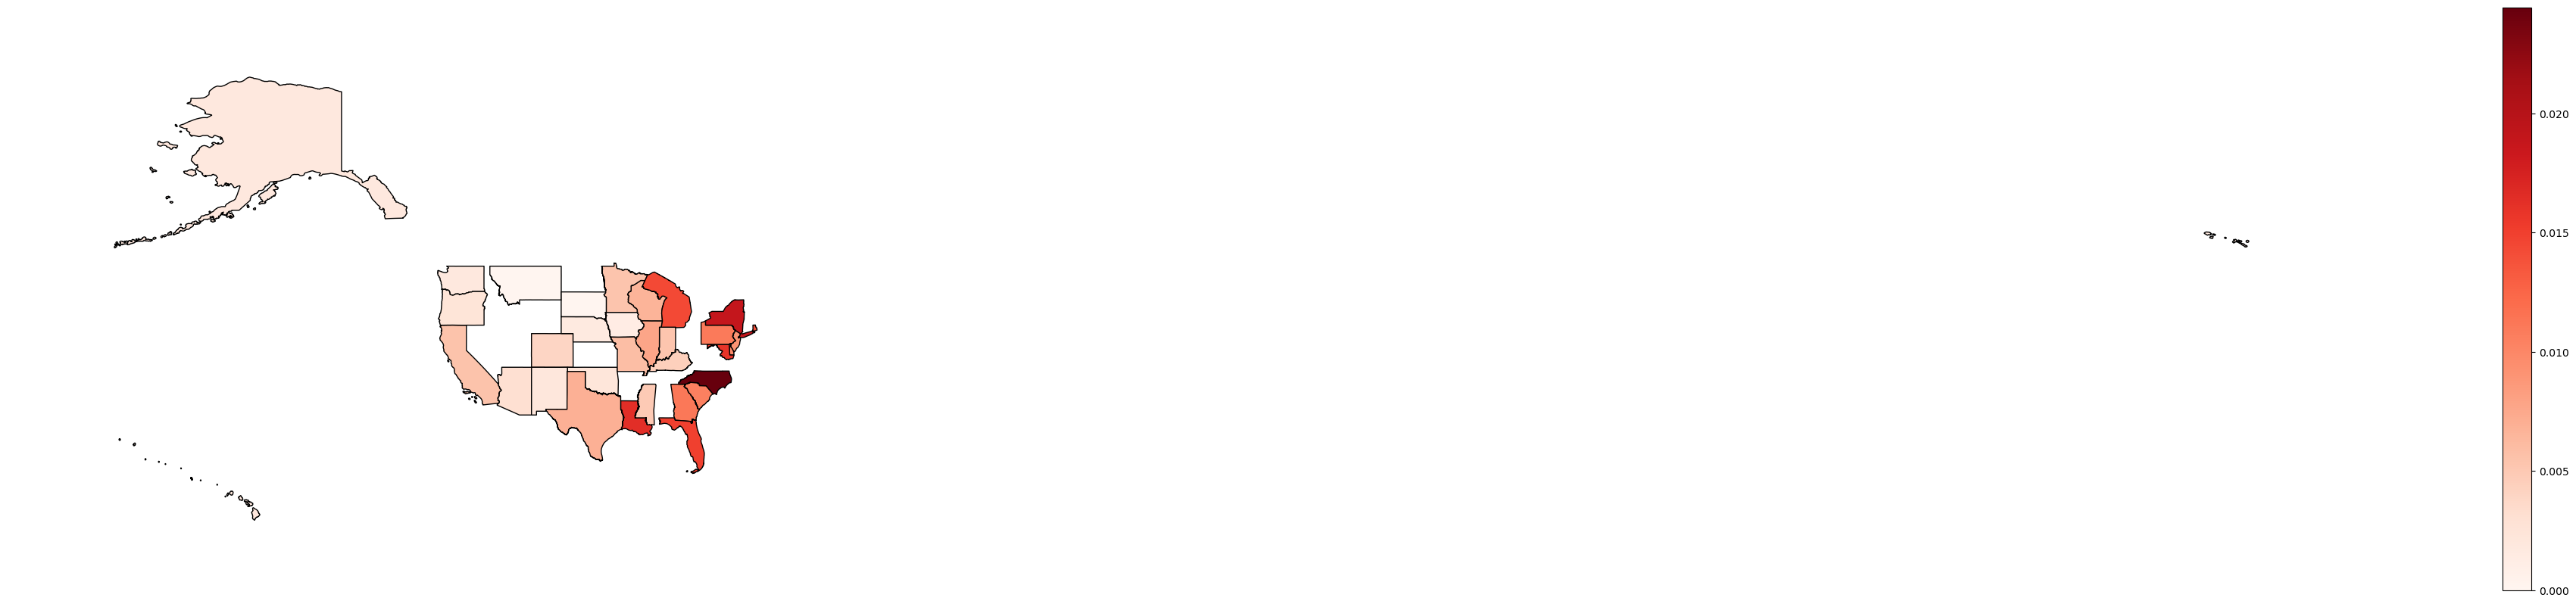

In [28]:
fig, ax = plt.subplots(figsize=(50,10))
coke_state_map.plot(column = 'cocaine_percent', 
                    cmap = 'Reds', 
                    edgecolor = 'black',
                    legend = True,
                    ax = ax)
ax.axis('off');

plt.savefig('coke_map.png')

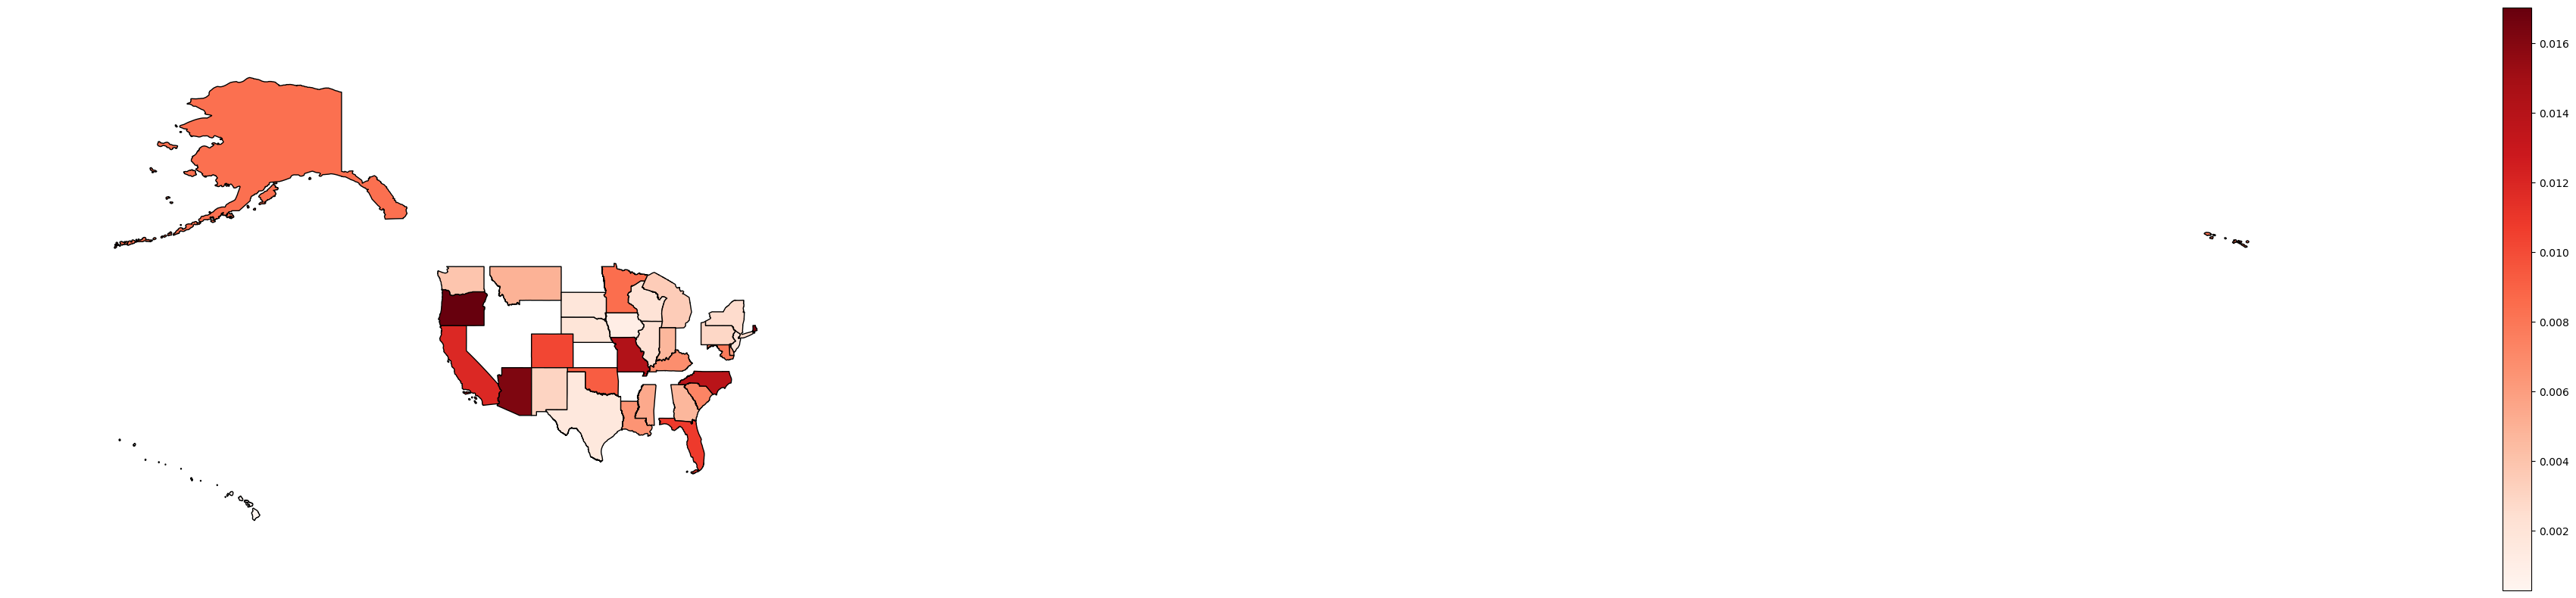

In [29]:
fig, ax = plt.subplots(figsize=(50,10))
fent_state_map.plot(column = 'fentanyl_percent', 
                    cmap = 'Reds', 
                    edgecolor = 'black',
                    legend = True,
                    ax = ax)
ax.axis('off');
plt.savefig('fent_map.png')